# Fake product detect from shopee

## scrape machine

### import

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import bs4
import pandas as pd

In [22]:
url_L=[]
name_L=[]
price_L=[]
sold_L=[]
amount_reviewer_L=[]
all_store_reviewer_L=[]
all_product_store_L=[]
response_rate_L=[]
follower_L=[]
joined_L=[]
rating_L=[]
new_url_L=[]

### Set up the driver

In [23]:
s = Service('F:\Code\edgedriver_win64 (3)\msedgedriver.exe') #your path driver
driver=webdriver.Edge(service=s)#choose the driver ex.Edge, Firefox
link=f"https://shopee.co.th/search?keyword=airpod&page=1 " #insert the shopee url
driver.get(link)

#change language to english
WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.XPATH,f"/html/body/div[2]/div[1]/div[1]/div/div[3]/div[2]/button")))
eng_button=driver.find_element(By.XPATH,"/html/body/div[2]/div[1]/div[1]/div/div[3]/div[2]/button")
eng_button.click()

### Functions

In [24]:
wait=WebDriverWait(driver, 10)
def k_and_m_to_float(txt):
    "ฟังก์ชันเพื่อเปลี่ยน k เป็น 1000 เปลี่ยน m เป็น 1000000 เปลี่ยนเป็น float, this function change k to multiple 100 and m to multiple 1000000 "
    if txt[-1]=="k":
        txt=(float(txt[:-1])*1000)
    elif txt[-1]=="m":
        txt=(float(txt[:-1])*1000000)
    else:
        txt=(float(txt))
    return txt

def hours_convert(txt):
    "ฟังก์ชันเพื่อเปลี่ยนทุกหน่วยเป็นหน่วยชั่วโมง,change, this function change all time unit in to hours"
    if txt[-10:]==' years ago':
        txt=float(txt[:-10])*360*24
    elif txt[-10:]==' hours ago':
        txt=float(txt[:-10])
    elif txt[-11:]==' months ago':
        txt=float(txt[:-11])*30*24
    elif txt[-9:]==' days ago':
        txt=float(txt[:-9])*24
    else:
        txt=(float(0))
    return txt

def waiter(datatype,positiondata):
    "datatype ex. By.CSS_SELECTOR ,positiondata ex. f'.pmmxKx'"
    wait.until(EC.visibility_of_element_located((datatype,positiondata)))
    global soup
    soup=bs4.BeautifulSoup(driver.page_source)

### Url archive page

In [25]:
for N_of_page in range(1,12): #total of page 
    link=f"https://shopee.co.th/search?keyword=airpod&page={N_of_page}" #ex. "https://shopee.co.th/search?keyword=phone&page={N_of_page}"
    driver.get(link)
    driver.execute_script('document.body.style.zoom="1%"')
    try:
        WebDriverWait(driver, 10).until(EC.visibility_of_all_elements_located((By.CSS_SELECTOR,f".row")))
        soup=bs4.BeautifulSoup(driver.page_source)
        url=soup.find_all('div', {'class':'col-xs-2-4 shopee-search-item-result__item'})
    except:
        print("not found a product row")
    for i in url:
        url_L.append(i.find('a').get('href'))
        print(len(url_L))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


### Scrape Feature(X) 

In [26]:
for i in range ((len(url_L))):
    w=('https://shopee.co.th'+url_L[i])
    new_url_L.append(w)
    print(len(new_url_L))
    driver.get(w)
    driver.execute_script('document.body.style.zoom="1%"')    
    soup=bs4.BeautifulSoup(driver.page_source)
    #ชื่อสินค้า Name
    try:
        waiter(By.CSS_SELECTOR,".VCNVHn")
        name_L.append(soup.find('div',{'class':'VCNVHn'}).text)
    except:
        name_L.append("None")
    #ราคา Price
    try:
        waiter(By.CSS_SELECTOR,f".pmmxKx")
        try:
            price_L.append(float(soup.find('div',{'class':'pmmxKx'}).text.replace(",",'').replace("฿","")))
        except:
            price_L.append(float((soup.find('div',{'class':'pmmxKx'}).text.replace(",",'').replace("฿","")).partition(' - ')[0]))
    except:
        price_L.append("None")
    #จำนวนที่ขาย sold
    try:
        waiter(By.CSS_SELECTOR,f"._45NQT5")
        sold=(soup.find('div',{'class':'_45NQT5'}).text)
        sold_L.append(k_and_m_to_float(sold))
    except:
        sold_L.append('None')
    #จำนวนคนรีวิว amount reviewer
    try:
        waiter(By.CSS_SELECTOR,f"div.HXGLyo:nth-child(2) > div:nth-child(1)")
        amount_reviewer=(((soup.find_all('div',{'class':'MrYJVA'}))[1]).text)
        amount_reviewer_L.append(k_and_m_to_float(amount_reviewer))
    except:
        amount_reviewer_L.append(float(0))
    #จำนวนคนรีวิวร้านค้าทั้งหมด all store reviewer
    try:
        waiter(By.CSS_SELECTOR,f"div.MSPJbO:nth-child(1) > div:nth-child(1) > span:nth-child(2)")
        all_store_reviewer=((soup.find_all('span',{'class':'_32ZDbL'}))[0].text)
        all_store_reviewer_L.append(k_and_m_to_float(all_store_reviewer))
    except:
        all_store_reviewer_L.append('None')
    #จำนวนสินค้าทั้งหมดของร้านค้า all product of store
    try:
        waiter(By.CSS_SELECTOR,f".g54jiy")
        all_product_store_L.append(k_and_m_to_float((soup.find('span',{'class':'_32ZDbL g54jiy'}).text)))
    except:
        all_product_store_L.append('None')
    #อัตราการตอบกลับของร้านค้า response rate of store
    try:
        waiter(By.CSS_SELECTOR,f"div.MSPJbO:nth-child(2) > div:nth-child(1) > span:nth-child(2)")
        response_rate_L.append(float((soup.find_all('span',{'class':'_32ZDbL'}))[2].text.replace('%','')))
    except:
        response_rate_L.append('None')
    #จำนวนผู้ติดตาม follower of store
    try:
        waiter(By.CSS_SELECTOR,f"div.MSPJbO:nth-child(3) > div:nth-child(2) > span:nth-child(2)")
        follower_L.append(k_and_m_to_float((soup.find_all('span',{'class':'_32ZDbL'}))[5].text))
    except:
        follower_L.append('None')
    #เข้าร่วมเมื่อกี่ชั่วโมงแล้ว joined
    try:
        waiter(By.CSS_SELECTOR,f"div.pHNb7U:nth-child(1) > span:nth-child(2)")
        joined_L.append(hours_convert((soup.find_all('span',{'class':'_32ZDbL'}))[4].text))
    except:  
        joined_L.append('None')
    #rating
    try:
        waiter(By.CSS_SELECTOR,f".Ga-lTj")
        rating_L.append(float((soup.find('div',{'class':'MrYJVA Ga-lTj'})).text))
    except:
        rating_L.append(float(0))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


### Make to dataframe for use

In [27]:
shopee=pd.DataFrame([new_url_L,name_L,price_L,sold_L,amount_reviewer_L,all_store_reviewer_L,all_product_store_L,response_rate_L,follower_L,joined_L,rating_L]).transpose()
shopee.columns=['url','name','price','sold','amount reviewer','all reviewer of store','amount product','response rate','follower','joined','rating']

In [28]:
shopee.to_excel(r'F:\Code\Shopee_Data_Scraping\rawdata\earpod2.xlsx')

## Data

In [17]:
from sklearn.model_selection import train_test_split

In [11]:
url = (r"https://github.com/JackJessada/fake_product_detect/raw/main/data/thirddataset.xlsx")
df = pd.read_excel(url)

In [15]:
df.tail()

,ID,url,name,price,sold,amount reviewer,all reviewer of store,amount product,response rate,follower,joined,rating,comment,Label
4952,4952,https://shopee.co.th/RAZER-HEADSET-BLACKSHARK-...,RAZER HEADSET BLACKSHARK V2 X 2Y (RZ04-0324010...,1890,1.0,1,5600,2400,95,6100.0,34560,5.0,NaN,1
4953,4953,https://shopee.co.th/Urbanista-หูฟัง-London-Tr...,Urbanista หูฟัง London True Wireless,3990,6.0,2,6500,162,71,3700.0,34560,5.0,NaN,1
4954,4954,https://shopee.co.th/Poly-Voyager-6200-UC-หูฟั...,Poly Voyager 6200 UC หูฟังไร้สาย สำหรับการสนทนา,8091,2.0,1,83300,2200,98,268000.0,20880,5.0,NaN,1
4955,4955,https://shopee.co.th/Bose-หูฟังไร้สาย-Sleepbud...,Bose หูฟังไร้สาย Sleepbuds II True Wireless,9490,2.0,1,8000,1500,100,47300.0,10080,5.0,NaN,1
4956,4956,https://shopee.co.th/Docooler-Lenovo-Lp40-True...,Docooler Lenovo Lp40 True หูฟังไร้สาย Bt 5.1 พ...,376,2.0,2,2400,862,89,2600.0,14400,5.0,NaN,1


In [16]:
X = df.drop(['ID', 'url', 'name', 'comment', 'Label'], axis=1)
y = df['Label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #split data

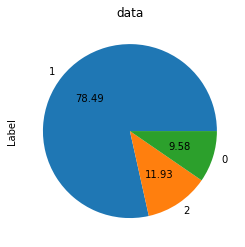

In [19]:
ax = y_train.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("data")

### over samplingsmote data

In [20]:
from imblearn.over_sampling import SMOTE

C:\Users\Jack\anaconda3\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (3916) in class 1 will be larger than the number of samples in the majority class (class #1 -> 3112)
  warnings.warn(


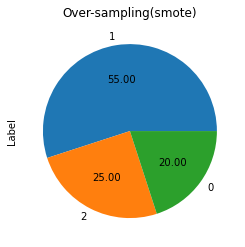

In [21]:
smote=SMOTE(sampling_strategy={0: 1424, 1: 3916, 2:1780},random_state=0,k_neighbors=7,)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
ax = y_train_sm.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling(smote)")

## model

### choose models

โดยการ cross validation

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [25]:
rf_clf = RandomForestClassifier()
xgb_clf=xgb.XGBClassifier()
knn_clf=KNeighborsClassifier()
skf = StratifiedKFold(10,shuffle=True)
for model in [rf_clf, xgb_clf, knn_clf]:
    print('Avg. R2- ' + str(model) + ': ' + str(np.mean(cross_val_score(model, X, y, cv=skf))))

Avg. R2- RandomForestClassifier(): 0.9152724828934506
Avg. R2- XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...): 0.9243528022157055
Avg. R2- KNeighborsClassifier(): 0.8928767513848159


### model

In [27]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [29]:
def classification_model(clf, X_train, y_train, X_test, y_test, show_feature_importance=True):
    ls_y_hat_train = []
    ls_y_train = []

    clf_model = clf.fit(X_train, y_train)
    y_hat_train = clf_model.predict(X_train)
    ls_y_hat_train.extend(y_hat_train)
    ls_y_train.extend(y_train)
    report_train = classification_report(ls_y_train, ls_y_hat_train)
    print('training set')
    print(report_train) 
    print('\n')
    ls_y_hat_test = []
    ls_y_test = []
    y_hat_test = clf_model.predict(X_test)
    ls_y_hat_test.extend(y_hat_test)
    ls_y_test.extend(y_test)
    report_test = classification_report(ls_y_test, ls_y_hat_test)
    print('test set')
    print(report_test) 
    print('\n')
    predicted = clf_model.predict(X_test)
    print(confusion_matrix(y_test, predicted))

    if show_feature_importance:
        try:
            print('Standardized Coeff.')
            print(pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":clf_model.coef_[0]}).to_string())
        except:
            try:
                print(pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":clf_model.feature_importances_}).to_string())
            except:
                print("No Standardized Coeff.")

In [30]:
rf_clf = RandomForestClassifier(n_estimators=50,max_depth=10, random_state=0)

In [41]:
classification_model(rf_clf,X_train_sm,y_train_sm,X_test,y_test)

training set
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1424
           1       1.00      0.98      0.99      3916
           2       0.93      0.97      0.95      1780

    accuracy                           0.97      7120
   macro avg       0.96      0.96      0.96      7120
weighted avg       0.97      0.97      0.97      7120



test set
              precision    recall  f1-score   support

           0       0.74      0.68      0.71        82
           1       0.98      0.95      0.96       804
           2       0.63      0.84      0.72       106

    accuracy                           0.91       992
   macro avg       0.78      0.82      0.80       992
weighted avg       0.92      0.91      0.92       992



[[ 56   5  21]
 [ 12 761  31]
 [  8   9  89]]
Standardized Coeff.
                 Feature  Coefficients
0                  price      0.212467
1                   sold      0.193171
2        amount reviewer     

### dump model

In [ ]:
from joblib import dump
clf_model = rf_clf.fit(X_train_sm, y_train_sm)
dump(clf_model,'rf_clf_model.joblib')

## Explainer

In [39]:
import shap
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
import seaborn as sns

In [33]:
shap_values = shap.TreeExplainer(rf_clf).shap_values(X_train)

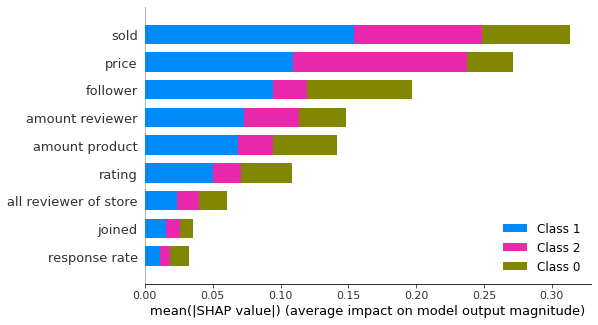

In [34]:
shap.summary_plot(shap_values, X_train)

<AxesSubplot:>

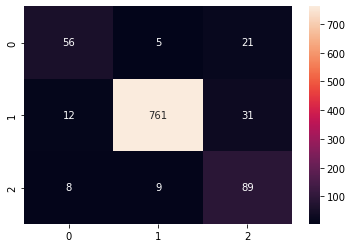

In [40]:
predicted = rf_clf.predict(X_test)
j=(confusion_matrix(y_test, predicted))
sns.heatmap(j, annot=True, fmt='g')

In [37]:
explainer = ClassifierExplainer(rf_clf, X_test, y_test, 
                               cats=X.columns,
                               labels=['0', '1','2'])

ExplainerDashboard(explainer).run()

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will s

 * Running on all addresses.
 * Running on http://192.168.1.101:8050/ (Press CTRL+C to quit)
192.168.1.101 - - [21/Jun/2022 11:41:10] "GET / HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:10] "GET /assets/bootstrap.min.css?m=1655632306.1486797 HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:10] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_5_1m1655632303.12.1.min.js HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:10] "GET /_dash-component-suites/dash/deps/react@16.v2_5_1m1655632303.14.0.min.js HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:10] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_5_1m1655632303.14.0.min.js HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:10] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_5_1m1655632303.8.1.min.js HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:10] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v1_1_0m1655632305.min.js HTTP/1.1" 200 -
192.168.1

192.168.1.101 - - [21/Jun/2022 11:41:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:16] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.1.101 - - [21/Jun/2022 11:41:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:16] "P

192.168.1.101 - - [21/Jun/2022 11:41:24] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:24] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:24] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:24] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:24] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:24] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:24] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.1.101 - - [21/Jun/2022 11:41:24] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:24] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:24] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:24] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.1.101 - - [21/Jun/2022 11:41:24] "P